In [1]:
import pickle as pkl
import matplotlib.pylab as plt
import numpy as np

In [2]:
path = '/home/ir-zani1/rds/rds-ukaea-ap001/ir-zani1/qualikiz/UKAEAGroupProject/outputs/'

out = {'retrain_losses':[],'retrain_test_losses':[],'post_test_loss':[]}
for i in range(2,14):
    try:
        name = path+f'bootstrapped_{i}_AL_lam_1_shallow_wide.pkl'
        with open(name,'rb') as f:
            d = pkl.load(f)
        out['retrain_losses'].append(d['out']['retrain_losses'])
        out['retrain_test_losses'].append(d['out']['retrain_test_losses'])
        out['post_test_loss'].append(d['out']['post_test_loss'])
    except:
        pass

out['retrain_losses'] = np.asarray(out['retrain_losses'])
out['post_test_loss'] = np.asarray(out['post_test_loss'])
out['retrain_test_losses'] = np.asarray(out['retrain_test_losses'])


/home/ir-zani1/anaconda3/envs/qualikiz/lib/python3.9/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


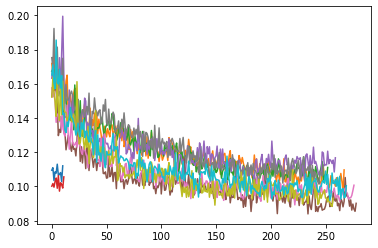

In [10]:
val_losses = []
for o in out['retrain_test_losses']:
    L = 0
    outs = []
    for oo  in o:
        outs.extend(oo)
        L+=len(oo)
        
    if L>30:
        val_losses.append(np.array(outs)[:200])
    plt.plot(np.arange(L),outs)        

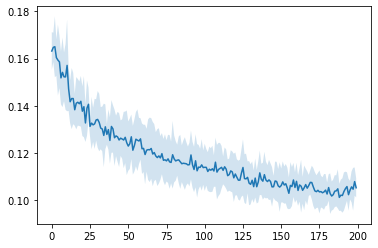

In [13]:
val_losses = np.array(val_losses)
mean = np.mean(val_losses, axis=0)
std = np.std(val_losses,axis=0)

plt.fill_between(range(len(mean)), mean-std,mean+std, alpha=0.2)
plt.plot(range(len(mean)), mean)



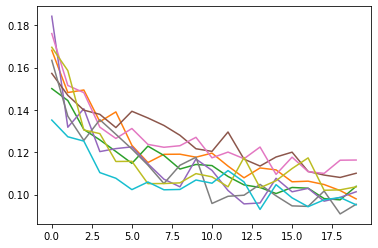

In [17]:
test_losses = []
for o in out['post_test_loss']:
    test_losses.append(np.array(o))
    plt.plot(np.arange(len(o)),o)        

/tmp/ipykernel_3866809/654279716.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  test_losses = np.array(test_losses)


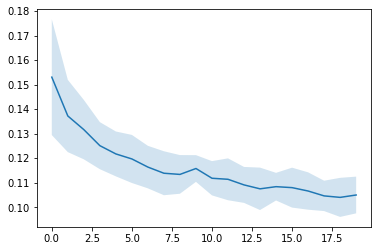

In [18]:
test_losses = np.array(test_losses)
mean = np.mean(test_losses, axis=0)
std = np.std(test_losses,axis=0)

plt.fill_between(range(len(mean)), mean-std,mean+std, alpha=0.2)
plt.plot(range(len(mean)), mean)


In [2]:
name = '/home/ir-zani1/rds/rds-ukaea-ap001/ir-zani1/qualikiz/UKAEAGroupProject/outputs/bootstrapped_AL_lam_1_shallow_wide.pkl'
with open(name,'rb') as f:
    shallow_dic = pkl.load(f)

name = '/home/ir-zani1/rds/rds-ukaea-ap001/ir-zani1/qualikiz/UKAEAGroupProject/outputs/bootstrapped_AL_lam_1_deep.pkl'
with open(name,'rb') as f:
    deep_dic = pkl.load(f)    

In [7]:
shallow_dic['out'][0].keys()


dict_keys(['train_loss_init', 'test_loss_init', 'class_train_loss_init', 'class_test_loss_init', 'class_train_acc_init', 'class_test_acc_init', 'retrain_losses', 'retrain_test_losses', 'post_test_loss', 'post_test_loss_unscaled', 'n_train_points', 'mse_before', 'mse_after', 'd_mse', 'd_uncert', 'd_novel_uncert', 'novel_uncert_before', 'novel_uncert_after', 'holdout_pred_before', 'holdout_pred_after', 'holdout_ground_truth', 'class_train_loss', 'class_val_loss', 'class_missed_loss', 'class_train_acc', 'class_val_acc', 'class_missed_acc', 'holdout_class_acc', 'holdout_class_loss'])

In [10]:
def plot(dic, key):
    out = []
    for d in dic['out']:
        out.append(d[key][0])

    print(out)        

In [14]:
plot(deep_dic, 'retrain_test_losses')

[[0.5797780420303345, 0.5764654628753663, 0.5799732572555542, 0.581846736240387, 0.5799014415740967, 0.5795176206588745, 0.5824356472015381, 0.5787011075019837, 0.5790482179641724, 0.5782875467300415, 0.5797785484313965], [0.5797780420303345, 0.5764654628753663, 0.5799732572555542, 0.581846736240387, 0.5799014415740967, 0.5795176206588745, 0.5824356472015381, 0.5787011075019837, 0.5790482179641724, 0.5782875467300415, 0.5797785484313965], [0.5797780420303345, 0.5764654628753663, 0.5799732572555542, 0.581846736240387, 0.5799014415740967, 0.5795176206588745, 0.5824356472015381, 0.5787011075019837, 0.5790482179641724, 0.5782875467300415, 0.5797785484313965], [0.5797780420303345, 0.5764654628753663, 0.5799732572555542, 0.581846736240387, 0.5799014415740967, 0.5795176206588745, 0.5824356472015381, 0.5787011075019837, 0.5790482179641724, 0.5782875467300415, 0.5797785484313965], [0.5797780420303345, 0.5764654628753663, 0.5799732572555542, 0.581846736240387, 0.5799014415740967, 0.5795176206588

In [36]:
with open('/home/ir-zani1/rds/rds-ukaea-ap001/ir-zani1/qualikiz/UKAEAGroupProject/outputs/baselines/random_efiitg_gb_regressor_losses_30000K.pkl','rb') as f:
    baseline = pkl.load(f)

In [22]:
baseline.keys()

dict_keys(['metrics', 'test_losses'])

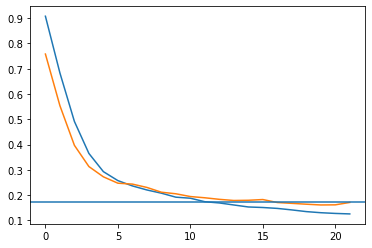

In [37]:
test_baseline = baseline['test_losses']
train_baseline = baseline['metrics']
plt.plot(range(len(train_baseline[0])), train_baseline[0])
plt.plot(range(len(train_baseline[0])), train_baseline[1])
plt.axhline(test_baseline)
#plt.plot(range(len(train)), train)

20000
20560
21107
21655
22202
22763
23329
23905
24471
25036
25585
26160
26742
27333
27887
28467
29028
29613
30208
30785


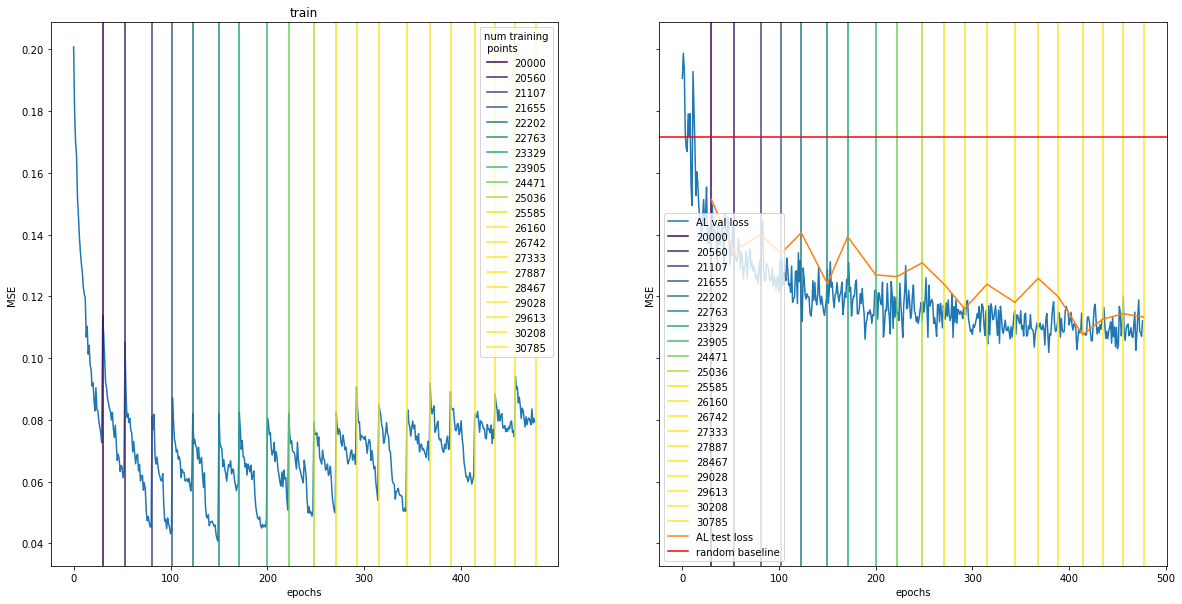

In [41]:
g, ax = plt.subplots(1,2, figsize=(20,10), sharey=True)
train = []
test = []
breaks = []
for i,(d1,d2) in enumerate(zip(dic['retrain_losses'],dic['retrain_test_losses'])):
    train.extend(d1)
    test.extend(d2)
    breaks.extend([len(d1)])
breaks = np.cumsum(breaks)
colors = [ plt.get_cmap('viridis')(i*25) for i in range(len(breaks))]
ax[0].plot(range(len(train)), train,)
ax[1].plot(range(len(test)), test, label='AL val loss')
for c, (label, b) in zip(colors,zip(dic['n_train_points'],breaks)):
    print(label)
    ax[0].axvline(b, label=label, color=c)
    ax[1].axvline(b, label=label,color=c)
ax[1].plot(breaks, dic['post_test_loss'], label='AL test loss')

ax[0].set_title('train')

ax[0].legend(title="num training\n points")
ax[0].set_xlabel('epochs')
ax[1].set_xlabel('epochs')
ax[0].set_ylabel('MSE')
ax[1].set_ylabel('MSE')
ax[1].axhline(test_baseline, color='red',label='random baseline')
ax[1].legend()

In [34]:
np.sqrt(dic['post_test_loss_unscaled'])

array([3.09760339, 2.92092733, 2.97840458, 2.91310977, 2.98457587,
       2.80444465, 2.97112366, 2.83646321, 2.82971355, 2.87968795,
       2.80122647, 2.71064171, 2.80244793, 2.73494549, 2.82376713,
       2.75539938, 2.61051956, 2.67157609, 2.69182811, 2.67955001])

In [4]:
plt.plot(range(len(dic['holdout_pred_before'])), dic['holdout_pred_before'], label='before')
plt.plot(range(len(dic['holdout_pred_after'])), dic['holdout_pred_after'], label='after')
plt.legend()

/home/ir-zani1/anaconda3/envs/qualikiz/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: Image size of 362x300022 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

In [6]:
np.asarray(dic['holdout_pred_before']).shape

(10, 10000)

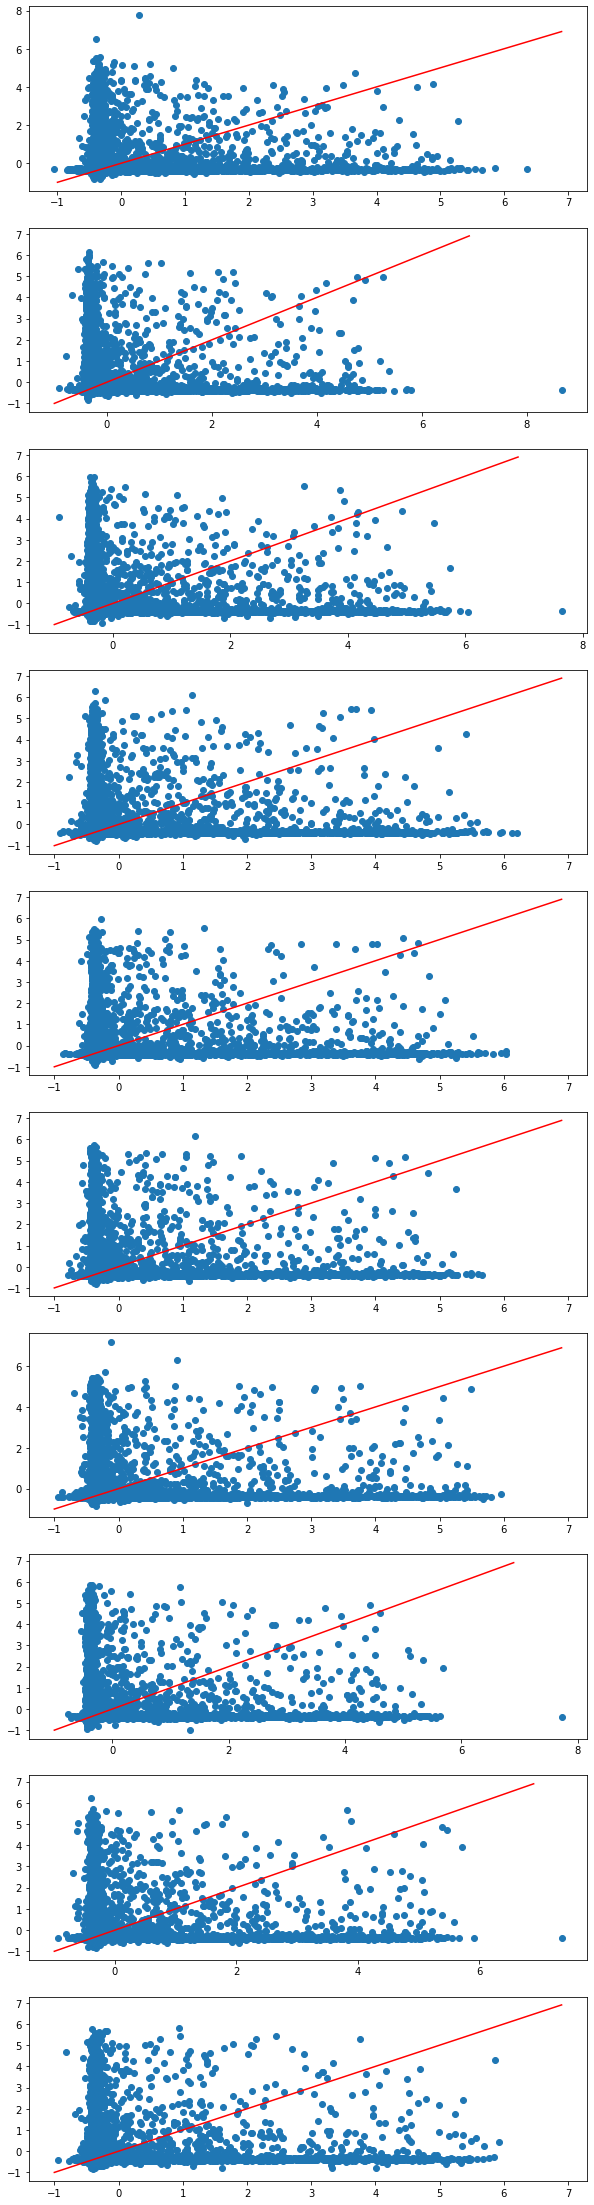

In [7]:
dim1 = len(dic['holdout_pred_before'])
fig, ax = plt.subplots(dim1, 1, figsize=(10,40))
for a, (d1,d2) in zip(ax.ravel(),  zip(dic['holdout_pred_before'], dic['holdout_pred_after'])):
    a.scatter(d1,d2)
    xx = np.arange(-1,7,0.1)
    a.plot(xx,xx, color='red')


In [ ]:
# To Do: add comparison with big model trained on 10^4 data points
# To Do: convert training size to percentage
# To Do:  explore candidate_batch hyperparam
# To Do: save scaler! Or descale all losses

20000
20591
21158
21735
22321
22897
23492
24081
24679
25258


Text(0, 0.5, 'MSE')

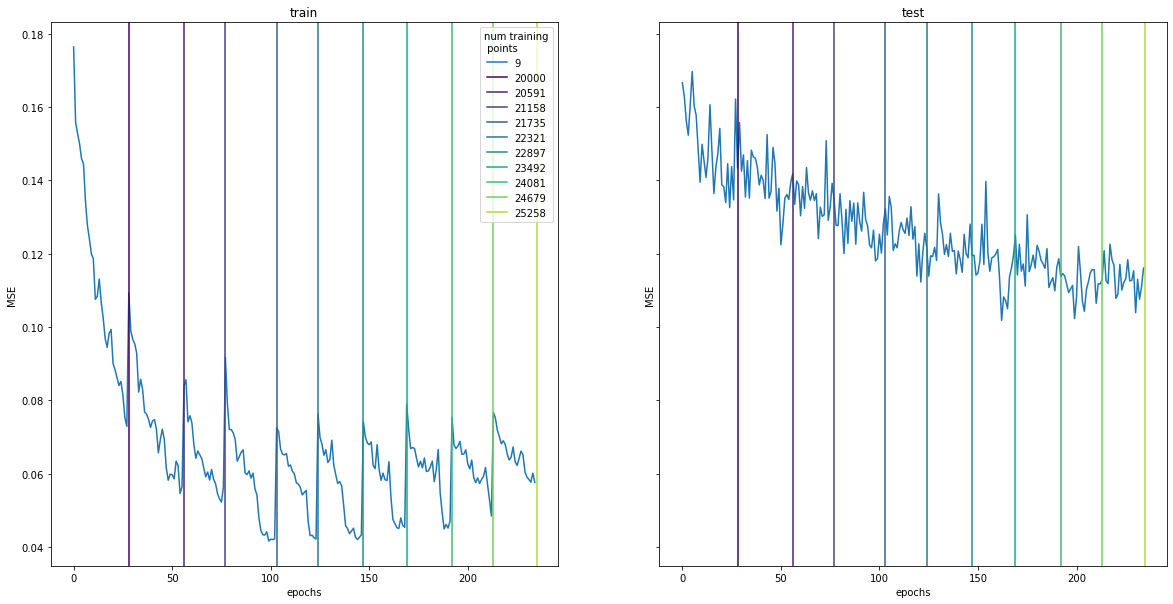

In [24]:
dic['n_train_points']

[20000, 20591, 21158, 21735, 22321, 22897, 23492, 24081, 24679, 25258]